In [1]:
import math as m
import numpy as np
import random as rnd
import re
import itertools as it
import pandas as pd
import matplotlib as matplotlib
import matplotlib.pyplot as plt
from scipy.special import factorial2
from scipy.special import factorial
from scipy.special import gamma
from scipy.special import binom
import scipy.stats as sps
import seaborn as sns
%matplotlib inline

# 8.1

Let Z∼Beta(a,b).

a. Find E(1/Z) using pattern integration.

b. Find Var(1/Z) using pattern integration.

### 8.1 Analytical Solution 

Since this is a function over the Beta distribution, we can multiply 1/z by the PDF and integrate: 

## $\int_{0}^1 \frac{\Gamma(a + b)}{\Gamma(a)\Gamma(b)} \frac{1}{z} z^{a - 1}(1 - z)^{1 - b}dz = \frac{\Gamma(a + b)}{\Gamma(a)\Gamma(b)} \int_{0}^1 z^{a - 2}(1 - z)^{1 - b}dz$ 

This looks really similar to the CDF of a Beta(a-1,b) random variable. We just need to multiply in the normalizing constant to make this a proper CDF. 

## $\frac{\Gamma(a + b)}{\Gamma(a)\Gamma(b)} \frac{\Gamma(a - 1)\Gamma(b)}{\Gamma(a - 1 + b)} \int_{0}^1 \frac{\Gamma(a - 1 + b)}{\Gamma(a - 1)\Gamma(b)}z^{a - 2}(1 - z)^{1 - b}dz = \frac{\Gamma(a + b)}{\Gamma(a)\Gamma(b)} \frac{\Gamma(a - 1)\Gamma(b)}{\Gamma(a - 1 + b)}$ 

We can further simplify this using the fact that $\Gamma(n+1)/\Gamma(n) = n.$ 

## $E[1/z] = \frac{a + b - 1}{a - 1}$ 

Similarly, for the $E[1/z^2]$ portion of Var(1/z), the integral looks like a Beta(a-2,b) variable. 

## $\int_0^1 \frac{1}{z^2} \frac{\Gamma(a + b)}{\Gamma(a)\Gamma(b)}z^{a - 1}(1 - z)^{b - 1} = \int_0^1 \frac{\Gamma(a + b)}{\Gamma(a)\Gamma(b)}z^{a - 3}(1 - z)^{b - 1} = $ 

## $\frac{\Gamma(a + b)}{\Gamma(a)\Gamma(b)} \frac{\Gamma(a - 2)\Gamma(b)}{\Gamma(a - 2 + b)} \int_{0}^1 \frac{\Gamma(a - 2 + b)}{\Gamma(a - 2)\Gamma(b)}z^{a - 3}(1 - z)^{1 - b}dz = \frac{\Gamma(a + b)}{\Gamma(a)\Gamma(b)} \frac{\Gamma(a - 2)\Gamma(b)}{\Gamma(a - 2 + b)} = \frac{(a + b - 2)(a + b -1)}{(a - 2)(a - 1)}$ 

## $Var(1/z^2) = E[1/z^2] - E[1/z]^2 = \frac{(a + b - 2)(a + b -1)}{(a - 2)(a - 1)} - (\frac{a + b - 1}{a - 1})^2 = \frac{b(a + b -1)}{(a - 2)(a - 1)^2}$ 

In [2]:
samps = 10000
a = 5
b = 2

beta_samps = np.random.beta(a = a, b = b, size = samps)

print('Simulated E[1/z]: %.2f | Analytical E[1/z]: %.2f' % (np.mean(1/beta_samps), (a+b-1)/(a-1)))
print('Simulated Var[1/z]: %.2f | Analytical Var[1/z]: %.2f' % (np.var(1/beta_samps), b*(a+b-1)/((a-2)*(a-1)**2)))

Simulated E[1/z]: 1.50 | Analytical E[1/z]: 1.50
Simulated Var[1/z]: 0.25 | Analytical Var[1/z]: 0.25


# 8.2

a. Let U∼Unif(0,1), B∼Beta(1,1), E∼Expo(10) and G∼Gamma(1,10) (all are independent). Find E(U−B+E−G) without using any calculations (just facts about each distribution)

b. For what value of n is $\frac{ \Big(\frac{\Gamma(n+1)}{\Gamma(n)}\Big)^2}{4}$ the PDF of a Standard Uniform?

### 8.2 Analytical Solution

a. We can expand this using the linearity of expectation: $E(U) - E(B) + E(E) - E(G)$.

Since the Beta and Uniform are symmetrical within [0,1], the means must both be 1/2. A Gamma distribution is a sum of k i.i.d Exponentials. Since k is 1 in this case, Gamma(1,10) = Expo(10). These must also cancel out. This leaves us with: $(0.5 - 0.5 + 1/\lambda - 1/\lambda)$ = 0.

b. The PDF of a standard uniform is just 1, which means we're solving:

## $\frac{ \Big(\frac{\Gamma(n+1)}{\Gamma(n)}\Big)^2}{4} = 1, (\frac{n\Gamma(n)}{\Gamma(n)})^2 = 4, n^2 = 4, n = \pm2$

In [3]:
# Part (a)
samps = 100000

U = np.mean(np.random.uniform(size = samps))

B = np.mean(np.random.beta(a = 1, b = 1, size = samps)) 

E = np.mean(np.random.exponential(scale = 1/10, size = samps))

G = np.mean(np.random.gamma(shape = 1, scale = 1/10, size = samps))

print('Simulated E(U-B+E-G) %.2f' % (U-B+E-G))

Simulated E(U-B+E-G) 0.00


# 8.3

The New England Patriots, considered by many as the greatest dynasty in modern sports, won 5 Super Bowls (NFL Championships) and played in 2 more from 2001 to 2017. The previous two coaches for the Patriots have been Pete Carroll (1997 - 1999) and Bill Belichick (2000 -). Carroll’s overall regular season record with the Patriots was 27-21 (27 wins and 21 losses), and Belichick’s current regular season record (at the time of this publication) is 201-71. Since both coached the same team in a similar time period, it may be reasonable to isolate and compare their coaching abilities based on their results.

Define pCarroll as the true probability that Pete Carroll will win a game that he coaches. Consider a Bayesian approach where we assign a random distribution to this parameter: a reasonable (uninformative) distribution would be pCarroll∼Beta(1,1). Based on Beta-Binomial conjugacy (where each game is treated as a Bernoulli trial with pCarroll probability of success), the posterior distribution of pCarroll after observing his regular season record is pCarroll∼Beta(1+27,1+21).

a. Consider pBelichick, the true probability that Bill Belichick will win a game that he coaches. First, if we assume that pBelichick follows the same distribution as pCarroll, find the probability of observing Belichick’s 201-71 record, or better.

b. By employing a similar approach to assign a distribution to pBelichick
as we did with pCarroll, compare E(pBelichick) and Var(pBelichick) with E(pCarroll) and Var(pCarroll).

c. If we assume that pCarroll follows the same distribution as pBelicik that we solved for in (b), find the probability of observing Carroll’s record of 27-21, or worse. Compare this to your answer to (a).

In [4]:
## Analytical Solution

# (a)

print('Prob Belichick under Carroll dist (or better): %.2f%%' % 
      (100*(1 - sps.beta.cdf(x = 201/(201+71), a = 1+27, b = 1+21))))

# (b)

def beta_var(a,b):
    
    return (a*b)/((a+b)**2 * (a+b+1))

print('E[pBelichick]: %.4f | E[pCarroll]: %.4f' % ((201+1)/(201+71+2), (27+1)/(27+21+2)))
print('Var[pBelichick]: %.4f | Var[pCarroll]: %.4f' % (beta_var(a=201+1,b=71+1),beta_var(a=27+1,b=21+1)))


# (c) Variance around Belichick much tighter due to larger sample size

print('Prob Carroll under Belichick dist (or worse): %.9f%%' % 
      (100*(sps.beta.cdf(x = 27/(27+21), a = 1+201, b = 1+71))))

Prob Belichick under Carroll dist (or better): 0.34%
E[pBelichick]: 0.7372 | E[pCarroll]: 0.5600
Var[pBelichick]: 0.0007 | Var[pCarroll]: 0.0048
Prob Carroll under Belichick dist (or worse): 0.000000096%


# 8.4

Solve the integral: 

## $\int_{0}^1 \sqrt{x - x^2} dx$

You may leave your answer in terms of the Γ function.

Hint: Try factoring the integrand into two different terms (both square roots) and then using Pattern Integration.

### 8.4 Analytical Solution

Rearranging a bit makes this look like a Beta(3/2,3/2) integral. We just need to fix the constant.

## $\int_{0}^1 \sqrt{x - x^2} dx = \int_{0}^1 \sqrt{x(1 - x)} dx = \int_{0}^1 x^{1/2} (1-x)^{1/2} dx$

## $\frac{\Gamma(3/2)\Gamma(3/2)}{\Gamma(3/2 + 3/2)} \frac{\Gamma(3/2 + 3/2)}{\Gamma(3/2)\Gamma(3/2)} \int_{0}^1 x^{1/2} (1-x)^{1/2} dx = \frac{\Gamma(3/2)\Gamma(3/2)}{\Gamma(3/2 + 3/2)} = \frac{\pi}{8}$

# 8.5

Let X∼Gamma(a,λ). Find an expression for the kth moment of X using pattern recognition integration, and use this expression to find E(X) and Var(X).

## $E(X^k) = \int_{0}^{\infty} \frac{\lambda^a}{\Gamma(a)} x^k x^{a-1} e^{-\lambda x} dx= \frac{\lambda^a}{\Gamma(a)}  \int_{0}^{\infty} x^{a+k-1} e^{-\lambda x} dx$

This looks like the CDF Gamma(a+k,λ) without the normalizing constant. Which means the expectation must be the reciprocal of the constant:

## $E(X^k) = \frac{\lambda^a\Gamma(a+k)}{\lambda^{a+k}\Gamma(a)} = \frac{\Gamma(a+k)}{\lambda^{k}\Gamma(a)}, E(X) = \frac{\Gamma(a+1)}{\lambda\Gamma(a)} = \frac{a\Gamma(a)}{\lambda\Gamma(a)} = \frac{a}{\lambda}$

## $Var(x) = E(x^2) = E(x)^2$

## $E(x^2) = \frac{\Gamma(a + 2)}{\Gamma(a)\lambda^2} = \frac{(a+1)a\Gamma(a)}{\lambda^2\Gamma(a)} = \frac{a^2 + a}{\lambda^2}$

## $Var(x) = \frac{a^2 + a}{\lambda^2} - \frac{a^2}{\lambda^2} = \frac{a}{\lambda^2}$

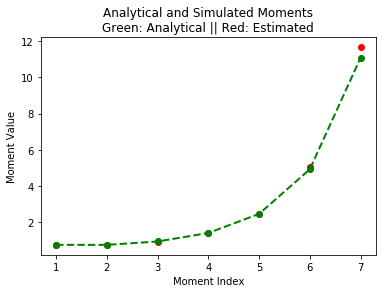

In [5]:
samps = 100000
a = 3
lamb = 4

def sample_moment(x,k):
    return 1/x.size * np.sum(x**k)

def analyt_moment(a,lamb,k):
    return gamma(a+k)/(gamma(a)*lamb**k)

gamma_samps = np.random.gamma(shape = a, scale = 1/lamb, size = samps)

moments = np.arange(1,8)

probs = pd.DataFrame({
    'Moment': moments,
    'SampMom': [sample_moment(gamma_samps,k=k) for k in moments],
    'AnaltMom': [analyt_moment(a=a,lamb=lamb,k=k) for k in moments]
})


_ = plt.plot(probs['Moment'],
             probs['SampMom'], 
             'ro')

_ = plt.plot(probs['Moment'],
            probs['AnaltMom'],
            'go--',
            linewidth = 2)

_ = plt.ylabel('Moment Value')
_ = plt.xlabel('Moment Index')

_ = plt.title('Analytical and Simulated Moments\nGreen: Analytical || Red: Estimated')

# 8.6

Let X∼Pois(λ), where λ is unknown. We put a Gamma prior on λ such that λ∼Gamma(a,b). Find λ|X, the posterior distribution of λ.

### 8.6 Analytical Solution

We can use Baye's rule to find the posterior. We can also ignore any constants and look for the 'meaty' part of any PDF we recognize. We can do this since the constants must always simplify to match up with the 'meaty' part of the PDF to form the full proper posterior PDF.

## $f(\lambda |  X = x) \propto P(X = x|\lambda), f(\lambda) = \frac{e^{-\lambda} \lambda^x}{x!} \cdot \frac{1}{\Gamma(a)} b^a \lambda^{a - 1} e^{-\lambda b} \propto e^{-\lambda(1 + b)} \lambda^{a + x - 1}$

That looks like a $Gamma(x + a, 1 + b)$ variable. Since the prior and posterior are both gamma, this is an example of *conjugacy*.

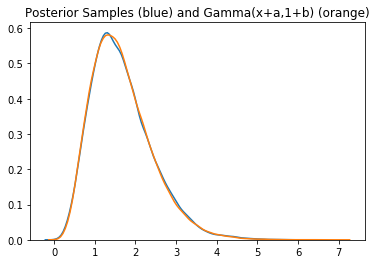

In [6]:
samps = 100000

a = 3
b = 2
x = 2

gamma_samps = np.random.gamma(shape = a, scale = 1/b, size = samps)
pois_samps = np.random.poisson(lam = gamma_samps, size = samps)

gamma_anlt =  np.random.gamma(shape = a+x, 
                             scale = 1/(b+1), 
                             size = samps)

_= sns.distplot(gamma_samps[pois_samps == x], hist = False)
_= sns.distplot(gamma_anlt, hist = False)
_ = plt.title('Posterior Samples (blue) and Gamma(x+a,1+b) (orange)')

# 8.7

Let X∼Beta(a,b) and Y=cX for some constant c.

a. Find f(y).  
b. Does Y have a Beta distribution?

### 8.7 Analytical Solution

We can use the transformation theorem, since this is a function on X. 

(a)  

## $Y = cX, X = \frac{Y}{c}, \frac{dx}{dy} = \frac{1}{c}$

## $f(y) = f(x) |\frac{dx}{dy}| = \frac{\Gamma(a + b)}{\Gamma(a)\Gamma(b)}(\frac{y}{c})^{a - 1}(1 - \frac{y}{c})^{b - 1} \frac{1}{c}$

(b)

Since the Beta's support lies on [0,1], multiplying the density by c scales it to [0,c]. This breaks the support of the traditional Beta. This is a different distribution.

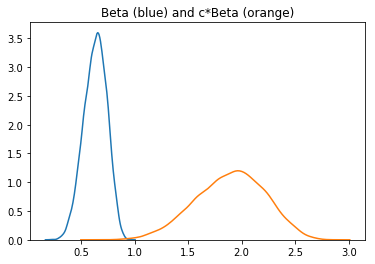

In [7]:
samps = 10000

a = 12
b = 7
c = 3

beta_samps = np.random.beta(a = a, b = b, size = samps)

_= sns.distplot(beta_samps, hist = False)
_= sns.distplot(c*beta_samps, hist = False)
_ = plt.title('Beta (blue) and c*Beta (orange)')

# 8.8

Let a,b and m be positive integers such that a + b > m. Find:  

## $\sum_{x = 0}^m {a \choose x}{b \choose m - x}$

### 8.8 Analytical Solution

This looks like a Hypergeometric distribution without the normalizing constant:

## ${a + b \choose m} \sum_{x = 0}^m \frac{{a \choose x}{b \choose m - x}}{{a + b \choose m}} = \sum_{x = 0}^m {a \choose x}{b \choose m - x} = {a + b \choose m}$

In [8]:
a = 3
b = 12
m = 7

print('Full sum: %s' % 
         int(np.sum([binom(a,x) * binom(b,m-x) for x in range(m+1)]))
     )

print('Norm Const: %s' % 
         int(binom(a+b,m))
     )

Full sum: 6435
Norm Const: 6435


# 8.9

Solve the integral:  

## $\int_{0}^1 \int_{0}^1 (xy)^{a - 1} \big((1 - x)(1 - y)\big)^{b - 1} dx dy$

### 8.9 Analytical Solution

First, let's separate out x and y in the integral:  

## $\int_{0}^1 \int_{0}^1 x^{a - 1} (1 - x)^{b - 1} y^{a - 1} (1 - y)^{b - 1}dx dy$

This looks like the 'meaty' part of the Beta PDF, twice. Since x/y are independent and the support matches, it looks like we're just missing the normalizing constant. Multiplying in the normalizing constant *twice* will gives us two Beta integrals, which become one. That leaves us with:  

## $\Big(\frac{\Gamma(a)\Gamma(b)}{\Gamma(a + b)}\Big)^2\int_{0}^1 \int_{0}^1 \frac{\Gamma(a + b)}{\Gamma(a)\Gamma(b)}x^{a - 1} (1 - x)^{b - 1} \frac{\Gamma(a + b)}{\Gamma(a)\Gamma(b)}y^{a - 1} (1 - y)^{b - 1}dx dy$

## $ = \Big(\frac{\Gamma(a)\Gamma(b)}{\Gamma(a + b)}\Big)^2$

# 8.10

Let c be a constant and X be a random variable. For the following distributions of X, see if Y=X+c has the same distribution as X (not the same parameters, but the same distribution).

a. X∼Unif(0,1)  
b. X∼Beta(a,b)  
c. X∼Expo(λ)  
d. X∼Bin(n,p)  
e. X∼Pois(λ)  

### 8.10 Analytical Solution

The Uniform is the only distribution above with a flexible support, based on parameters a and b. Every other distribution gets its support broken above with the addition of a constant. For the Uniform distribution:  

## $Y = X + c, X = Y - c, \frac{dx}{dy} = 1, f(x) = 1$

## $f(y) = f(x)|\frac{dx}{dy}|,  f(y) = 1, Y \sim Unif(c, c + 1)$

# 8.11

Brandon is doing his homework, but he is notorious for taking frequent breaks. The breaks he takes over the next hour follow a Poisson process with rate λ. Given that he takes less than 3 breaks overall, what is the probability that he takes a break in the first half hour? Your answer should only include λ (and constants).

Hint: conditioned on the number of arrivals, the arrival times of a Poisson process are uniformly distributed.

### 8.11 Analytical Solution 

Since we know that the distribution of breaks is Poisson *and* that he takes fewer than 3, we must normalize those probabilities so they sum to 1 again. 

### $P(X = 0) = \frac{e^{-\lambda}}{e^{-\lambda} + \lambda e^{-\lambda} + \lambda^2 e^{\lambda}/2}, P(X = 1) = \frac{\lambda e^{-\lambda}}{e^{-\lambda} + \lambda e^{-\lambda} + \lambda^2 e^{\lambda}/2}, P(X = 2) = \frac{\lambda^2 e^{\lambda}/2}{e^{-\lambda} + \lambda e^{-\lambda} + \lambda^2 e^{\lambda}/2}$   

Since the arrival times of a Poisson process are uniformly distributed:   
* If there are no breaks, there's no chance of a break in the first half hour 
* If there is one break, there's 1/2 chance of a break in the first half hour 
* If there are two breaks, there's a 3/4 chance of a break in the first half hour 

That last part comes from the fact that the minimum of two standard Uniform distributions has CDF:   

## $P(X < x) = 1 - F(x)^2 = 1 - \frac{1}{2}^2 = \frac{3}{4}$ 

The problem asked for the probability of at least one break within the first half hour. That means that for the two Uniformly distributed draws, at least one of them must be within the first half hour. 

To arrive at the solution, we just weigh the outcomes above by the probability mass of each break scenario:   

## $P(A) = P(X = 1)/2 + 3P(X = 2)/4$ 

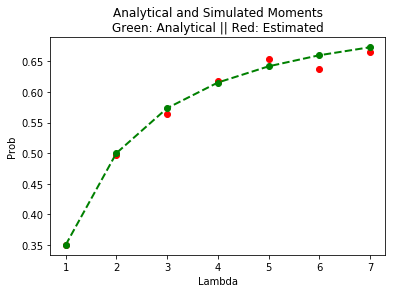

In [9]:
def sim_prob(lamb, samps):

    # Simulating total number of breaks within 1 hour
    breaks = np.random.poisson(lam = lamb, size = samps)

    # Of the simulations with 1 break, how many of those occured within the first 30 mins
    one_break = np.mean(np.random.uniform(size = np.sum(breaks == 1)) < 0.5)

    # Of the simulations with 2 breaks, did any of them occur within the first 30 mins
    two_breaks = np.mean(np.min(np.random.uniform(size = (np.sum(breaks == 2),2)),axis=1) < 0.5)

    # Renormalizing Pois prob since we know < 3 obs
    sim_prob = np.mean(breaks == 1)/np.mean(breaks < 3) * one_break + np.mean(breaks == 2)/np.mean(breaks < 3) * two_breaks
    
    return sim_prob

def analt_prob(lamb):
    
    return ((lamb/2 * np.exp(-lamb)) + ((3/4)*lamb**2/2 * np.exp(-lamb)))/sps.poisson.cdf(k = 2, mu = lamb)

##

lambs = np.arange(1,8)

probs = pd.DataFrame({
    'Lambda': lambs,
    'SimProb': [sim_prob(lamb = lamb, samps = 10000) for lamb in lambs],
    'AnaltProb': [analt_prob(lamb = lamb) for lamb in lambs],
})


_ = plt.plot(probs['Lambda'],
             probs['SimProb'], 
             'ro')

_ = plt.plot(probs['Lambda'],
            probs['AnaltProb'],
            'go--',
            linewidth = 2)

_ = plt.ylabel('Prob')
_ = plt.xlabel('Lambda')

_ = plt.title('Analytical and Simulated Moments\nGreen: Analytical || Red: Estimated')

# 8.12

You again find yourself in a diving competition; in this competition, you take 3 dives, and each is scored by a judge from 0 to 1 (1 being the best, 0 the worst). The scores are continuous (i.e., you could score a .314, etc.). The judge is completely hapless, meaning that the scores are completely random and independent. On average, what will your highest score be? On average, what will your lowest score be?

### 8.12 Analytical Probability

We know that the Order Statistics of a Uniform are Beta such that $Beta(j, n-j+1)$. The mean of a Beta parameterized like this is: $\frac{j}{j+n-j+1} = \frac{j}{n+1}$. The 3rd order statistic represents the maximum and the 1st represents the minimum:

## $\text{E[highest score]} = \frac{j}{n+1} = \frac{3}{3+1} = \frac{3}{4}$

## $\text{E[lowest score]} = \frac{j}{n+1} = \frac{1}{3+1} = \frac{1}{4}$

In [10]:
samps = 10000

unifs = np.random.uniform(size = (samps,3))

print('E[highest score]: %.2f' % np.mean(np.max(unifs,axis=1)))
print('E[lowest score]: %.2f' % np.mean(np.min(unifs,axis=1)))

E[highest score]: 0.75
E[lowest score]: 0.25


# 8.13

Imagine a flat, 2-D circle on which n>1 blobs are randomly (uniformly) placed along the outside of the circle. All of the blobs travels in the clockwise direction, and each blob is assigned independently assigned a speed from draws of a Unif(0,1) distributions (the higher the draw, the faster the speed).

If a blob ‘catches’ up to a slower blob in front of it, the fast blob ‘eats’ the slow bob. The fast blob does not change size (size is irrelevant in this structure anyways) but it now travels slower: specifically, it takes the speed of the slower blob that it just ate.

Imagine letting this system run forever. Let X be the random variable that represents the average speed of all surviving blobs (note that this random variable is an average, not necessarily a single point). Find E(X).

### 8.13 Analytical Solution

Over the very long term, every slow blob will eventually be eaten by a faster one. Since the fastest blob eventually travels at the slowest blob's speed, we need to find the expected speed of the slowest blob. This is just the mean of the first order statistic of a collection of standard Uniform distributions: $\frac{1}{n+1}$.

# 8.14

Imagine a subway station where trains arrive according to a Poisson Process with rate parameter λ1. Independently, customers arrive to the station according to a Poisson Process with rate parameter λ2. Each time that a train arrives, it picks up all of the customers at the station and departs.

If you arrive at the station and see 5 customers there (i.e., 5 customers have arrived since the last train departed) how long should you expect to wait for the next train?

### 8.14 Analytical Solution 

The waiting times between arrivals in a Poisson Process are exponentially distributed. Since the exponential distribution is memoryless, it doesn't matter how long you've been waiting for a train to arrive. The time until the next trail arrival is still distributed Expo(λ1). 

We could estimate how long we've been waiting already because we see 5 customers on the subway tracks. However, this isn't what the problem is asking for. 